# Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np #manipulação de arrays

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# pré-processamento de dados e divisão entre conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

#criar, treinar e avaliar redes neurais
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

import os

## Ponto de partida:

In [ ]:
!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 95% 108M/113M [00:00<00:00, 191MB/s] 
100% 113M/113M [00:00<00:00, 188MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m1-011-01.jpg', 'm-039-01.jpg', 'm-065-01.jpg', 'm1-037-01.jpg', 'm-044-01.jpg', 'f1-004-01.jpg', 'm1-039-01.jpg', 'm-038-01.jpg', 'm-099-01.jpg', 'm1-005-01.jpg', 'm-016-01.jpg', 'm1-007-01.jpg', 'm-073-01.jpg', 'f-043-01.jpg', 'f-010-01.jpg', 'm-015-01.jpg', 'm-085-01.jpg', 'm-034-01.jpg', 'm1-028-01.jpg', 'm-049-01.jpg', 'm-091-01.jpg', 'm1-036-01.jpg', 'm-018-01.jpg', 'm-077-01.jpg', 'f-033-01.jpg', 'm-097-01.jpg', 'm-095-01.jpg', 'm-031-01.jpg', 'f-027-01.jpg', 'm-027-01.jpg', 'm-025-01.jpg', 'f-018-01.jpg', 'f1-011-01.jpg', 'f-024-01.jpg', 'm-089-01.jpg', 'f1-012-01.jpg', 'm-096-01.jpg', 'f-026-01.jpg', 'm1-023-01.jpg', 'm-041-01.jpg', 'f-039-01.jpg', 'm-010-01.jpg', 'f1-007-01.jpg', 'm-071-01.jpg', 'f1-001-01.jpg', 'm1-017-01.jpg', 'm-069-01.jpg', 'f-008-01.jpg', 'm-014-01.jpg', 'm-075-01.jpg', 'f1-010-01.jpg', 'm-052-01.jpg', 'm-061-01.jpg', 'm-019-01.jpg', 'f-022-01.jpg', 'm1-024-01.jpg', 'm-050-01.jpg', 'm-029-01.jpg', 'm1-038-01.jpg', 'f-005-01.jpg', 'm-037-01.jpg', 'm1-01

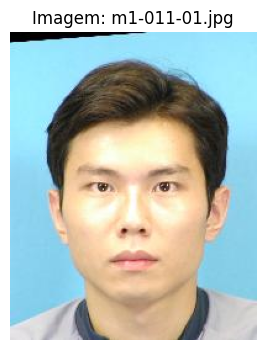

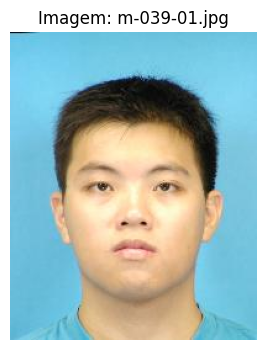

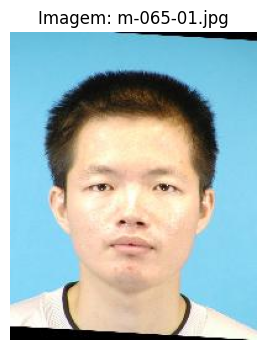

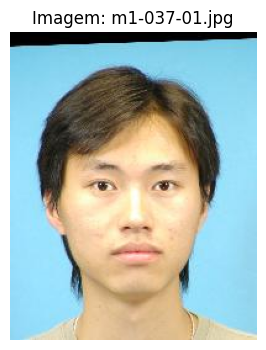

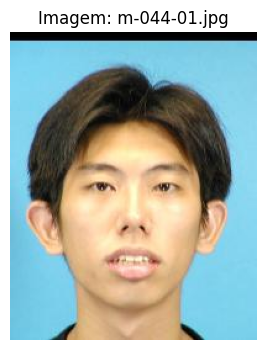

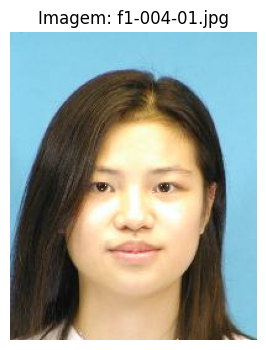

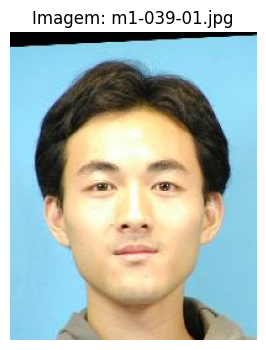

In [ ]:
from PIL import Image

photos_folder = "photos"

# Listar os arquivos na pasta
files_in_photos = list_files_in_folder(photos_folder)

# Visualização de  algumas imagens
for i, file_name in enumerate(files_in_photos[:7]):  # exibição a 5 imagens
    file_path = os.path.join(photos_folder, file_name)
    try:
        img = Image.open(file_path)  # Abrir a imagem usando Pillow
        plt.figure(figsize = (4, 4))  # Configurar o tamanho da figura
        plt.imshow(img)  # Mostrar a imagem
        plt.title(f"Imagem: {file_name}")
        plt.axis('off')  # Ocultar os eixos
        plt.show()
    except Exception as e:
        print(f"Erro ao abrir a imagem {file_name}: {e}")


In [ ]:
def list_subfolders(folder_path):
    """Lista todas as subpastas no diretório fornecido."""
    try:
        subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
        return subfolders
    except FileNotFoundError:
        print(f"Erro: Pasta não encontrada em {folder_path}")
        return []

photos_subfolders = list_subfolders(photos_folder)
print("Subpastas encontradas:", photos_subfolders)

Subpastas encontradas: []


In [ ]:
# Filtrar imagens masculinas:
masc_images = [m for m in files_in_photos if m.startswith('m-')]
print(f"Imagens masculinas encontradas: {len(masc_images)}")

# Filtrar imagens femininas:
female_images = [f for f in files_in_photos if f.startswith('f-')]
print(f"Imagens femininas encontradas: {len(female_images)}")

Imagens masculinas encontradas: 93
Imagens femininas encontradas: 39


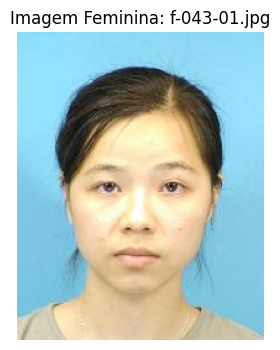

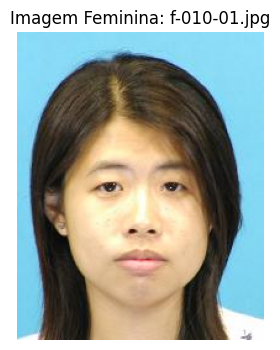

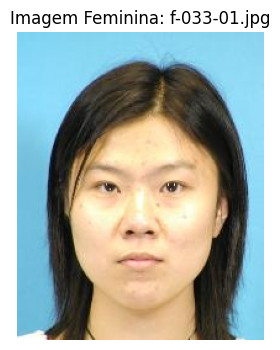

In [ ]:
for i, file_name in enumerate(female_images[:3]):
    file_path = os.path.join(photos_folder, file_name)
    try:
        img = Image.open(file_path)  # Carregar a imagem
        plt.figure(figsize=(4, 4))  # Configurar o tamanho da figura
        plt.imshow(img)  # Mostrar a imagem
        plt.title(f"Imagem Feminina: {file_name}")
        plt.axis('off')  # Ocultar os eixos
        plt.show()
    except Exception as e:
        print(f"Erro ao abrir a imagem {file_name}: {e}")

In [ ]:
total_images = len(files_in_photos)
print(f"Total de imagens: {total_images}")
print(f"Proporção de imagens femininas: {len(female_images) / total_images:.2%}")
print(f"Proporção de imagens masculinas: {len(masc_images) / total_images:.2%}")


Total de imagens: 188
Proporção de imagens femininas: 20.74%
Proporção de imagens masculinas: 49.47%


In [ ]:
# Identificar imagens não classificadas
outras_images = [f for f in files_in_photos if not f.startswith('f-') and not f.startswith('m-')]
print(f"Imagens não classificadas: {len(outras_images)} imagens.")

Imagens não classificadas: 56 imagens.


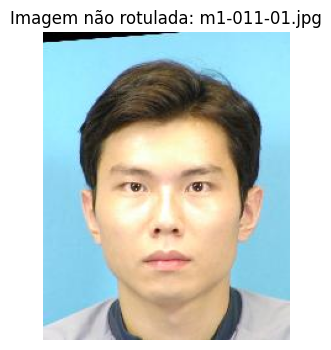

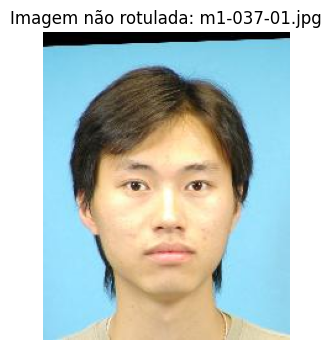

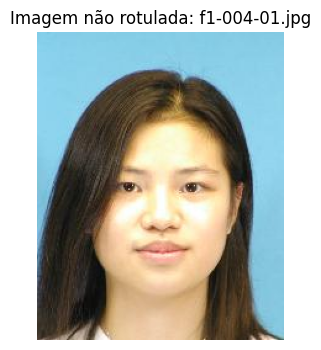

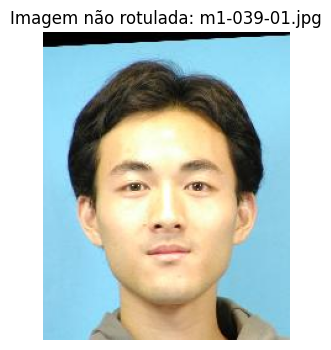

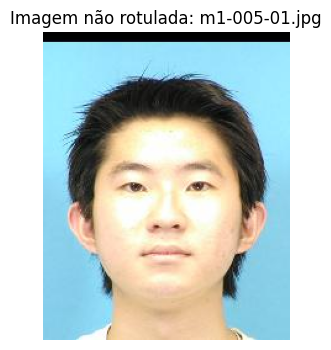

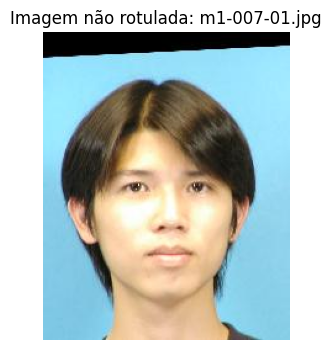

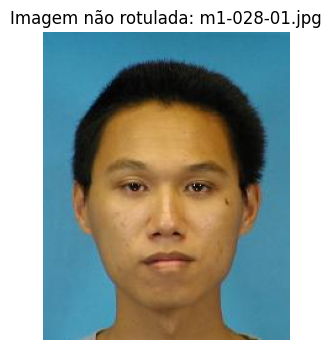

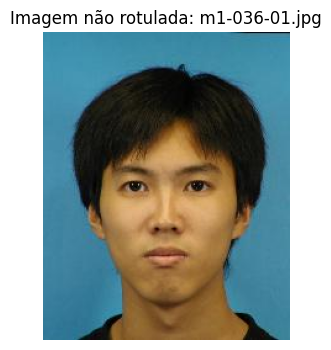

In [ ]:
# Visualizar algumas imagens não classificadas
for i, file_name in enumerate(outras_images[:8]):  # Limitar a exibição a 5 imagens
    file_path = os.path.join(photos_folder, file_name)
    try:
        img = Image.open(file_path)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Imagem não rotulada: {file_name}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Erro ao abrir a imagem {file_name}: {e}")


In [ ]:
# Listar todas as imagens e exibir seus nomes
for i, file_name in enumerate(outras_images):
    print(f"Imagem não rotulada {i}: {file_name}")

Imagem não rotulada 0: m1-011-01.jpg
Imagem não rotulada 1: m1-037-01.jpg
Imagem não rotulada 2: f1-004-01.jpg
Imagem não rotulada 3: m1-039-01.jpg
Imagem não rotulada 4: m1-005-01.jpg
Imagem não rotulada 5: m1-007-01.jpg
Imagem não rotulada 6: m1-028-01.jpg
Imagem não rotulada 7: m1-036-01.jpg
Imagem não rotulada 8: f1-011-01.jpg
Imagem não rotulada 9: f1-012-01.jpg
Imagem não rotulada 10: m1-023-01.jpg
Imagem não rotulada 11: f1-007-01.jpg
Imagem não rotulada 12: f1-001-01.jpg
Imagem não rotulada 13: m1-017-01.jpg
Imagem não rotulada 14: f1-010-01.jpg
Imagem não rotulada 15: m1-024-01.jpg
Imagem não rotulada 16: m1-038-01.jpg
Imagem não rotulada 17: m1-013-01.jpg
Imagem não rotulada 18: f1-014-01.jpg
Imagem não rotulada 19: m1-030-01.jpg
Imagem não rotulada 20: m1-006-01.jpg
Imagem não rotulada 21: m1-033-01.jpg
Imagem não rotulada 22: m1-027-01.jpg
Imagem não rotulada 23: m1-016-01.jpg
Imagem não rotulada 24: m1-003-01.jpg
Imagem não rotulada 25: m1-026-01.jpg
Imagem não rotulada 26

## Rotulando as imagens sem rótulo

In [ ]:
import re

# Função para renomear as imagens
def rename_images(image_list, folder_path):
    for file_name in image_list:
        # Substituindo o número após a letra ('m1-' por 'm-', 'f1-' por 'f-', etc.)
        new_name = re.sub(r'([mf])\d{1,2}-(\d{3}-\d{2})', r'\1-\2', file_name)

        # Caminhos completos dos arquivos
        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_name)

        # Renomear o arquivo
        try:
            os.rename(old_path, new_path)
            print(f"Renomeado: {file_name} -> {new_name}")
        except Exception as e:
            print(f"Erro ao renomear {file_name}: {e}")

photos_folder = "photos"
rename_images(outras_images, photos_folder)

Erro ao renomear m1-011-01.jpg: [Errno 2] No such file or directory: 'photos/m1-011-01.jpg' -> 'photos/m-011-01.jpg'
Erro ao renomear m1-037-01.jpg: [Errno 2] No such file or directory: 'photos/m1-037-01.jpg' -> 'photos/m-037-01.jpg'
Erro ao renomear f1-004-01.jpg: [Errno 2] No such file or directory: 'photos/f1-004-01.jpg' -> 'photos/f-004-01.jpg'
Erro ao renomear m1-039-01.jpg: [Errno 2] No such file or directory: 'photos/m1-039-01.jpg' -> 'photos/m-039-01.jpg'
Erro ao renomear m1-005-01.jpg: [Errno 2] No such file or directory: 'photos/m1-005-01.jpg' -> 'photos/m-005-01.jpg'
Erro ao renomear m1-007-01.jpg: [Errno 2] No such file or directory: 'photos/m1-007-01.jpg' -> 'photos/m-007-01.jpg'
Erro ao renomear m1-028-01.jpg: [Errno 2] No such file or directory: 'photos/m1-028-01.jpg' -> 'photos/m-028-01.jpg'
Erro ao renomear m1-036-01.jpg: [Errno 2] No such file or directory: 'photos/m1-036-01.jpg' -> 'photos/m-036-01.jpg'
Erro ao renomear f1-011-01.jpg: [Errno 2] No such file or direct

In [ ]:
# Exibir a lista de imagens
print("Imagens no diretório:", photos_folder)
for image in files_in_photos:
    print(image)

Imagens no diretório: photos
m1-011-01.jpg
m-039-01.jpg
m-065-01.jpg
m1-037-01.jpg
m-044-01.jpg
f1-004-01.jpg
m1-039-01.jpg
m-038-01.jpg
m-099-01.jpg
m1-005-01.jpg
m-016-01.jpg
m1-007-01.jpg
m-073-01.jpg
f-043-01.jpg
f-010-01.jpg
m-015-01.jpg
m-085-01.jpg
m-034-01.jpg
m1-028-01.jpg
m-049-01.jpg
m-091-01.jpg
m1-036-01.jpg
m-018-01.jpg
m-077-01.jpg
f-033-01.jpg
m-097-01.jpg
m-095-01.jpg
m-031-01.jpg
f-027-01.jpg
m-027-01.jpg
m-025-01.jpg
f-018-01.jpg
f1-011-01.jpg
f-024-01.jpg
m-089-01.jpg
f1-012-01.jpg
m-096-01.jpg
f-026-01.jpg
m1-023-01.jpg
m-041-01.jpg
f-039-01.jpg
m-010-01.jpg
f1-007-01.jpg
m-071-01.jpg
f1-001-01.jpg
m1-017-01.jpg
m-069-01.jpg
f-008-01.jpg
m-014-01.jpg
m-075-01.jpg
f1-010-01.jpg
m-052-01.jpg
m-061-01.jpg
m-019-01.jpg
f-022-01.jpg
m1-024-01.jpg
m-050-01.jpg
m-029-01.jpg
m1-038-01.jpg
f-005-01.jpg
m-037-01.jpg
m1-013-01.jpg
m-047-01.jpg
m-032-01.jpg
f1-014-01.jpg
m-086-01.jpg
m-040-01.jpg
m1-030-01.jpg
m-101-01.jpg
m-074-01.jpg
m-026-01.jpg
f-031-01.jpg
m-046-01.jpg
m-

In [ ]:
import os

# Caminho para a pasta onde as imagens estão armazenadas
photos_folder = "photos"

# Listar todos os arquivos no diretório
all_files = os.listdir(photos_folder)

# Filtrar para mostrar apenas os arquivos de imagem, por exemplo, com extensão .jpg ou .png
image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Exibir a lista de imagens (incluindo as renomeadas)
print("Imagens no diretório:", photos_folder)
for image in image_files:
    print(image)


Imagens no diretório: photos
m-039-01.jpg
m-065-01.jpg
m-044-01.jpg
m-038-01.jpg
m-099-01.jpg
m-016-01.jpg
m-073-01.jpg
f-043-01.jpg
f-010-01.jpg
m-015-01.jpg
m-085-01.jpg
m-034-01.jpg
m-049-01.jpg
m-091-01.jpg
m-018-01.jpg
m-077-01.jpg
f-033-01.jpg
m-097-01.jpg
m-095-01.jpg
m-031-01.jpg
f-027-01.jpg
m-027-01.jpg
m-025-01.jpg
f-018-01.jpg
f-024-01.jpg
m-089-01.jpg
m-096-01.jpg
f-026-01.jpg
m-041-01.jpg
f-039-01.jpg
m-010-01.jpg
m-071-01.jpg
m-069-01.jpg
f-008-01.jpg
m-014-01.jpg
m-075-01.jpg
m-005-01.jpg
m-052-01.jpg
m-061-01.jpg
m-019-01.jpg
f-022-01.jpg
m-050-01.jpg
m-029-01.jpg
m-007-01.jpg
f-005-01.jpg
m-037-01.jpg
m-004-01.jpg
m-047-01.jpg
m-032-01.jpg
m-086-01.jpg
m-040-01.jpg
m-101-01.jpg
f-002-01.jpg
m-074-01.jpg
m-026-01.jpg
f-031-01.jpg
m-046-01.jpg
m-030-01.jpg
m-023-01.jpg
m-058-01.jpg
f-011-01.jpg
m-054-01.jpg
f-028-01.jpg
f-006-01.jpg
m-022-01.jpg
m-090-01.jpg
f-019-01.jpg
f-016-01.jpg
m-056-01.jpg
m-083-01.jpg
m-036-01.jpg
f-040-01.jpg
f-036-01.jpg
m-012-01.jpg
m-024-01.

In [ ]:
# Lista de imagens antes da renomeação (exemplo)
before_rename = ["m1-011-01.jpg", "f1-004-01.jpg", "m1-037-01.jpg", ...]

# Lista de imagens depois da renomeação (do diretório)
after_rename = image_files  # Obtida com o código acima

# Comparar antes e depois
renamed_images = set(before_rename) & set(after_rename)  # Interseção: imagens que foram renomeadas
not_renamed_images = set(before_rename) - set(after_rename)  # Diferença: imagens que não foram renomeadas

print("Imagens renomeadas:")
for image in renamed_images:
    print(image)

print("\nImagens não renomeadas:")
for image in not_renamed_images:
    print(image)


Imagens renomeadas:

Imagens não renomeadas:
f1-004-01.jpg
m1-011-01.jpg
Ellipsis
m1-037-01.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuração de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Exemplo de como gerar imagens femininas aumentadas
for file_name in female_images[:5]:  # Escolher algumas imagens femininas
    file_path = os.path.join(photos_folder, file_name)
    img = Image.open(file_path)
    img_array = np.array(img)  # Converter para array
    img_array = img_array.reshape((1,) + img_array.shape)  # Ajustar o formato
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='augmented_images', save_prefix='f-', save_format='jpg'):
        i += 1
        if i > 5:  # Gerar 5 novas imagens por arquivo
            break


## Inicializando

In [ ]:
# Configurar seed para reprodutibilidade
np.random.seed(23)
tf.random.set_seed(23)

In [ ]:
def criar_arquivo_rotulos():
    """
    Cria arquivo CSV com rótulos para as imagens
    0 - Masculino, 1 - Feminino
    """
    pasta_fotos = "photos"
    arquivos = list_files_in_folder(pasta_fotos)

    # Definir rótulos manualmente (exemplo)
    # Você deve ajustar isso de acordo com suas próprias anotações
    rotulos = {arquivo: 0 for arquivo in arquivos}  # Padrão todos como masculino

    # Salvar rótulos
    df = pd.DataFrame({
        'arquivo': list(rotulos.keys()),
        'rotulo': list(rotulos.values())
    })
    df.to_csv('rotulos.csv', index=False)
    return df

In [ ]:
import cv2
def carregar_e_preprocessar_imagens(diretorio_imagens, df_rotulos):
    """
    Carrega e pré-processa as imagens
    """
    imagens = []
    rotulos = []

    for idx, linha in df_rotulos.iterrows():
        caminho_imagem = os.path.join(diretorio_imagens, linha['arquivo'])
        if os.path.exists(caminho_imagem):

            # Carregar e redimensionar imagem
            img = cv2.imread(caminho_imagem)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (200, 250))

            # Normalizar imagem
            img = img.astype('float32') / 255.0

            imagens.append(img)
            rotulos.append(linha['rotulo'])

    return np.array(imagens), np.array(rotulos)

# Modelo CNN

In [ ]:
def criar_modelo_cnn():
    """
    Cria modelo CNN para classificação com regularização adicional
    """
    modelo = models.Sequential([
        # Primeira camada convolucional
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Segunda camada convolucional
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Terceira camada convolucional
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Camadas densas
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    return modelo

## Visualização

In [ ]:
def plotar_metricas(historico, y_teste, y_pred_prob):
    """
    Plotagem de métricas de treinamento e avaliação
    """
    # Plotar acurácia e perda
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(historico.history['accuracy'], label='Acurácia Treino')
    plt.plot(historico.history['val_accuracy'], label='Acurácia Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(historico.history['loss'], label='Perda Treino')
    plt.plot(historico.history['val_loss'], label='Perda Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()

    plt.tight_layout()
    plt.savefig('metricas_treinamento.png')
    plt.close()

    # Plotar curva ROC
    taxa_falso_positivo, taxa_verdadeiro_positivo, _ = roc_curve(y_teste, y_pred_prob)
    roc_auc = auc(taxa_falso_positivo, taxa_verdadeiro_positivo)

    plt.figure(figsize=(8, 6))
    plt.plot(taxa_falso_positivo, taxa_verdadeiro_positivo, color='darkorange',
             lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC (Receiver Operating Characteristic)')
    plt.legend(loc="lower right")
    plt.savefig('curva_roc.png')
    plt.close()

## Outro

In [ ]:
def analisar_classificacoes_incorretas(modelo, X_teste, y_teste, arquivos_teste):
    """
    Analisa imagens classificadas incorretamente
    """
    y_pred = (modelo.predict(X_teste) > 0.5).astype(int)
    indices_errados = np.where(y_pred.flatten() != y_teste)[0]

    print("\nAnálise de Imagens Classificadas Incorretamente:")
    print(f"Total de imagens classificadas incorretamente: {len(indices_errados)}")

    for idx in indices_errados:
        print(f"Arquivo: {arquivos_teste[idx]}")
        print(f"Rótulo verdadeiro: {'Feminino' if y_teste[idx] == 1 else 'Masculino'}")
        print(f"Rótulo previsto: {'Feminino' if y_pred[idx] == 1 else 'Masculino'}")
        print("-" * 50)

# Main

In [ ]:
def main():
    # Criar ou carregar rótulos
    if not os.path.exists('rotulos.csv'):
        df_rotulos = criar_arquivo_rotulos()
    else:
        df_rotulos = pd.read_csv('rotulos.csv')

    # Carregar e pré-processar imagens
    imagens, rotulos = carregar_e_preprocessar_imagens('photos', df_rotulos)

    # Dividir dataset
    X_temp, X_teste, y_temp, y_teste, arquivos_temp, arquivos_teste = train_test_split(
        imagens, rotulos, df_rotulos['arquivo'].values,
        test_size=0.2, random_state=23
    )

    X_treino, X_val, y_treino, y_val, arquivos_treino, arquivos_val = train_test_split(
        X_temp, y_temp, arquivos_temp,
        test_size=0.375, random_state=23
    )

    print(f"Amostras de treino: {len(X_treino)}")
    print(f"Amostras de validação: {len(X_val)}")
    print(f"Amostras de teste: {len(X_teste)}")

    # Criar e compilar modelo
    modelo = criar_modelo_cnn()
    modelo.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Treinar modelo
    historico = modelo.fit(
        X_treino, y_treino,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
        ]
    )

    # Avaliar modelo
    y_pred_prob = modelo.predict(X_teste)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcular métricas
    f1 = f1_score(y_teste, y_pred)
    print(f'\nF1-Score: {f1:.4f}')

    # Plotar métricas
    plotar_metricas(historico, y_teste, y_pred_prob)

    # Analisar classificações incorretas
    analisar_classificacoes_incorretas(modelo, X_teste, y_teste, arquivos_teste)

    # Salvar modelo
    modelo.save('modelo_classificacao_faces.h5')

if __name__ == "__main__":
    main()


Amostras de treino: 93
Amostras de validação: 57
Amostras de teste: 38


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.4778 - loss: 1.0108 - val_accuracy: 0.0000e+00 - val_loss: 1.0491
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.5252 - loss: 0.8409 - val_accuracy: 0.0000e+00 - val_loss: 0.8945
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.5506 - loss: 0.7999 - val_accuracy: 0.0351 - val_loss: 0.8278
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.4538 - loss: 0.8256 - val_accuracy: 0.0351 - val_loss: 0.8605
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.5672 - loss: 0.8285 - val_accuracy: 0.9825 - val_loss: 0.6471
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5506 - loss: 0.7552 - val_accuracy: 1.0000 - val_loss: 0.5134
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5359 - loss: 0.7527 - val_accuracy: 1.0000 - val_loss: 0.4140
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.6756 - loss: 0.7369 - val_accuracy: 1.0000 - val_loss: 0.3935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step



Análise de Imagens Classificadas Incorretamente:
Total de imagens classificadas incorretamente: 0


## Codigo completo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix
import os
import cv2
from PIL import Image
import re

class ImagePreprocessor:
    def __init__(self, photos_folder="photos"):
        self.photos_folder = photos_folder
        self.files_in_photos = self._list_files_in_folder()
        self.masc_images = []
        self.female_images = []
        self.incorrectly_labeled_images = []
        self._categorize_images()

    def _list_files_in_folder(self):
        """Lista todos os arquivos na pasta."""
        try:
            return os.listdir(self.photos_folder)
        except FileNotFoundError:
            print(f"Erro: Pasta não encontrada em {self.photos_folder}")
            return []

    def _categorize_images(self):
        """Categoriza as imagens em masculinas, femininas e incorretamente rotuladas."""
        for img in self.files_in_photos:
            if img.startswith('m-'):
                self.masc_images.append(img)
            elif img.startswith('f-'):
                self.female_images.append(img)
            elif re.match(r'[mf]\d+-', img):
                self.incorrectly_labeled_images.append(img)

    def print_statistics(self):
        """Imprime estatísticas sobre as imagens."""
        total_images = len(self.files_in_photos)
        print(f"\nEstatísticas do Dataset:")
        print(f"Total de imagens: {total_images}")
        print(f"Imagens masculinas corretamente rotuladas: {len(self.masc_images)}")
        print(f"Imagens femininas corretamente rotuladas: {len(self.female_images)}")
        print(f"Imagens com rótulos incorretos: {len(self.incorrectly_labeled_images)}")

        if self.incorrectly_labeled_images:
            print("\nImagens que precisam ser renomeadas:")
            for img in self.incorrectly_labeled_images:
                print(f"  {img}")

    def fix_image_labels(self):
        """Corrige os rótulos das imagens que estão no formato incorreto."""
        print("\nCorrigindo rótulos das imagens...")
        for old_name in self.incorrectly_labeled_images:
            # Converter m1- ou f1- para m- ou f-
            new_name = re.sub(r'([mf])\d+-', r'\1-', old_name)
            old_path = os.path.join(self.photos_folder, old_name)
            new_path = os.path.join(self.photos_folder, new_name)

            try:
                os.rename(old_path, new_path)
                print(f"Renomeado: {old_name} -> {new_name}")
            except Exception as e:
                print(f"Erro ao renomear {old_name}: {e}")

        # Atualizar as listas após a renomeação
        self.files_in_photos = self._list_files_in_folder()
        self.masc_images = []
        self.female_images = []
        self.incorrectly_labeled_images = []
        self._categorize_images()

        print("\nEstatísticas após a correção:")
        self.print_statistics()

    def display_sample_images(self, category='all', num_samples=3):
        """Exibe amostras de imagens de uma categoria específica."""
        if category == 'female':
            images_to_show = self.female_images[:num_samples]
            title_prefix = "Imagem Feminina"
        elif category == 'male':
            images_to_show = self.masc_images[:num_samples]
            title_prefix = "Imagem Masculina"
        elif category == 'other':
            images_to_show = self.incorrectly_labeled_images[:num_samples]
            title_prefix = "Imagem não rotulada"
        else:
            images_to_show = self.files_in_photos[:num_samples]
            title_prefix = "Imagem"

        for i, file_name in enumerate(images_to_show):
            file_path = os.path.join(self.photos_folder, file_name)
            try:
                img = Image.open(file_path)
                plt.figure(figsize=(4, 4))
                plt.imshow(img)
                plt.title(f"{title_prefix}: {file_name}")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Erro ao abrir a imagem {file_name}: {e}")

class DatasetPreparation:
    def __init__(self, img_height=250, img_width=200):
        self.img_height = img_height
        self.img_width = img_width

    def load_and_preprocess_images(self, data_dir):
        """Carrega e pré-processa as imagens do diretório especificado."""
        images = []
        labels = []

        # Lista todas as imagens no diretório
        all_files = os.listdir(data_dir)
        image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

        # Define as classes baseado no prefixo do nome do arquivo
        self.class_names = ['feminino', 'masculino']

        for img_name in image_files:
            img_path = os.path.join(data_dir, img_name)

            # Determina a classe baseado no prefixo (f- ou m-)
            if img_name.startswith('f-'):
                label = 0  # feminino
            elif img_name.startswith('m-'):
                label = 1  # masculino
            else:
                continue  # pula imagens sem rótulo claro

            img = self._process_single_image(img_path)
            images.append(img)
            labels.append(label)

        return np.array(images), np.array(labels)

    def _process_single_image(self, img_path):
        """Processa uma única imagem."""
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.img_width, self.img_height))
        return img.astype('float32') / 255.0

    def split_dataset(self, X, y):
        """Divide o dataset em conjuntos de treino, validação e teste."""
        # Split inicial para separar o conjunto de teste (20%)
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=0.2, random_state=23, stratify=y
        )

        # Split do restante entre treino (50% do total) e validação (30% do total)
        val_size_adjusted = 0.375  # 30/80 = 0.375 para obter 30% do total
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adjusted,
            random_state=23, stratify=y_temp
        )

        return X_train, X_val, X_test, y_train, y_val, y_test

class ImageAugmentation:
    def __init__(self, target_size=(250, 200)):
        self.target_size = target_size
        self.datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.15,
            zoom_range=0.15,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def generate_augmented_images(self, source_dir, target_dir="photos_augmented", num_augmented=2):
        """
        Gera imagens aumentadas para cada imagem feminina no diretório fonte.
        Args:
            source_dir: Diretório com as imagens originais
            target_dir: Diretório para salvar as imagens aumentadas
            num_augmented: Número de imagens aumentadas para gerar por imagem original
        """
        if not os.path.exists(target_dir):
            os.makedirs(target_dir)

        # Lista todas as imagens femininas
        female_images = [f for f in os.listdir(source_dir) if f.startswith('f-')]
        print(f"\nGerando {num_augmented} imagens aumentadas para cada uma das {len(female_images)} imagens femininas...")

        for img_name in female_images:
            # Carregar e preprocessar a imagem
            img_path = os.path.join(source_dir, img_name)

            # Determina a classe baseado no prefixo (f- ou m-)
            if img_name.startswith('f-'):
                label = 0  # feminino
            elif img_name.startswith('m-'):
                label = 1  # masculino
            else:
                continue  # pula imagens sem rótulo claro

            img = self._process_single_image(img_path)
            img = np.expand_dims(img, 0)

            # Gerar imagens aumentadas
            i = 0
            for batch in self.datagen.flow(
                img,
                batch_size=1,
                save_to_dir=target_dir,
                save_prefix=f"aug_{img_name[:-4]}",
                save_format='jpg'
            ):
                i += 1
                if i >= num_augmented:
                    break

        print("Augmentação concluída!")

        # Copiar imagens originais para o novo diretório
        for img_name in os.listdir(source_dir):
            src_path = os.path.join(source_dir, img_name)
            dst_path = os.path.join(target_dir, img_name)
            if not os.path.exists(dst_path):
                import shutil
                shutil.copy2(src_path, dst_path)

        print(f"\nTotal de imagens no diretório aumentado: {len(os.listdir(target_dir))}")

class CNNModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self._build_model()

    def _build_model(self):
        """Constrói a arquitetura da CNN."""
        model = models.Sequential([
            # Bloco 1
            layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                         input_shape=self.input_shape),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Bloco 2
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Bloco 3
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Camadas Densas
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
        """Treina o modelo."""
        return self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size
        )

class ModelEvaluator:
    def __init__(self, model, class_names):
        self.model = model
        self.class_names = class_names

    def evaluate(self, X_test, y_test):
        """Avalia o modelo usando múltiplas métricas."""
        # Fazer predições
        y_pred = self.model.predict(X_test)
        self.y_pred_classes = np.argmax(y_pred, axis=1)

        # Calcular métricas
        self._calculate_f1_score(y_test)
        self._plot_confusion_matrix(y_test)
        self._plot_roc_curves(y_test, y_pred)
        self._analyze_misclassifications(X_test, y_test)

    def _calculate_f1_score(self, y_test):
        """Calcula e exibe o F1-Score."""
        f1 = f1_score(y_test, self.y_pred_classes, average='weighted')
        print(f'\nF1-Score: {f1:.4f}')

    def _plot_confusion_matrix(self, y_test):
        """Plota a matriz de confusão."""
        cm = confusion_matrix(y_test, self.y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title('Matriz de Confusão')
        plt.ylabel('Real')
        plt.xlabel('Predito')
        plt.show()

    def _plot_roc_curves(self, y_test, y_pred):
        """Plota as curvas ROC."""
        plt.figure(figsize=(10, 8))

        for i in range(len(self.class_names)):
            y_test_binary = (y_test == i).astype(int)
            y_pred_prob = y_pred[:, i]

            fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr,
                    label=f'{self.class_names[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title('Curvas ROC')
        plt.legend(loc='lower right')
        plt.show()

    def _analyze_misclassifications(self, X_test, y_test):
        """Analisa e exibe exemplos de classificações incorretas."""
        misclassified_idx = np.where(y_test != self.y_pred_classes)[0]

        if len(misclassified_idx) > 0:
            plt.figure(figsize=(15, 5))
            for i, idx in enumerate(misclassified_idx[:5]):
                plt.subplot(1, 5, i + 1)
                plt.imshow(X_test[idx])
                plt.title(f'Real: {self.class_names[y_test[idx]]}\n'
                         f'Pred: {self.class_names[self.y_pred_classes[idx]]}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()

def plot_training_history(history):
    """Plota o histórico de treinamento."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Acurácia do Modelo')
    ax1.set_ylabel('Acurácia')
    ax1.set_xlabel('Época')
    ax1.legend(['Treino', 'Validação'], loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Loss do Modelo')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Época')
    ax2.legend(['Treino', 'Validação'], loc='upper right')

    plt.tight_layout()
    plt.show()

def main():
    # Pré-processamento inicial das imagens
    preprocessor = ImagePreprocessor()
    preprocessor.print_statistics()
    preprocessor.fix_image_labels()

    # Realizar data augmentation nas imagens femininas
    augmentor = ImageAugmentation()
    augmentor.generate_augmented_images("photos", num_augmented=1)  # Gera 1 nova imagem para cada imagem feminina

    # Preparação do dataset (agora usando o diretório com imagens aumentadas)
    data_prep = DatasetPreparation()
    X, y = data_prep.load_and_preprocess_images('photos_augmented')
    X_train, X_val, X_test, y_train, y_val, y_test = data_prep.split_dataset(X, y)

    # Criar e treinar o modelo
    input_shape = (250, 200, 3)
    num_classes = len(data_prep.class_names)
    cnn = CNNModel(input_shape, num_classes)

    # Treinar o modelo
    history = cnn.train(X_train, y_train, X_val, y_val, epochs=30)

    # Plotar histórico de treinamento
    plot_training_history(history)

    # Avaliar o modelo
    evaluator = ModelEvaluator(cnn.model, data_prep.class_names)
    evaluator.evaluate(X_test, y_test)

if __name__ == "__main__":
    main()


Estatísticas do Dataset:
Total de imagens: 144
Imagens masculinas corretamente rotuladas: 101
Imagens femininas corretamente rotuladas: 43
Imagens com rótulos incorretos: 0

Corrigindo rótulos das imagens...

Estatísticas após a correção:

Estatísticas do Dataset:
Total de imagens: 144
Imagens masculinas corretamente rotuladas: 101
Imagens femininas corretamente rotuladas: 43
Imagens com rótulos incorretos: 0

Gerando 1 imagens aumentadas para cada uma das 43 imagens femininas...


AttributeError: 'ImageAugmentation' object has no attribute '_process_single_image'